In [17]:
# import scipy.io as sio

# # Load .mat file
# file_path = r"C:\Users\ayyag\OneDrive\Desktop\UTD - MHAD\Depth\Depth\a13_s1_t4_depth.mat"
# data = sio.loadmat(file_path)

# # Assuming the depth data is stored in a variable named 'depth_data' inside the .mat file
# depth_data = data['d_depth']


In [1]:
import scipy.io

# Load .mat file
mat_data = scipy.io.loadmat(r"C:\Users\ayyag\OneDrive\Desktop\UTD - MHAD\Depth\Depth\a11_s2_t4_depth.mat")

# Access the depth video data from the loaded dictionary
depth_video = mat_data['d_depth']  # Make sure the key matches the variable name in your .mat file


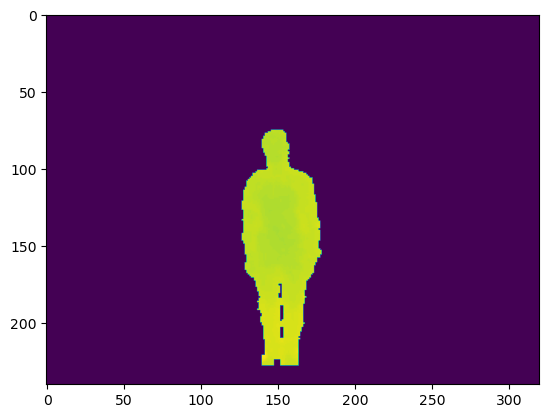

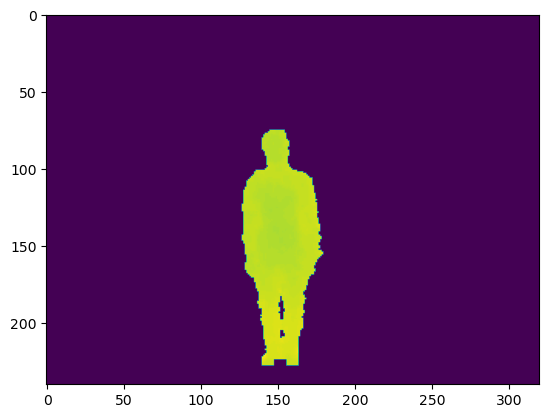

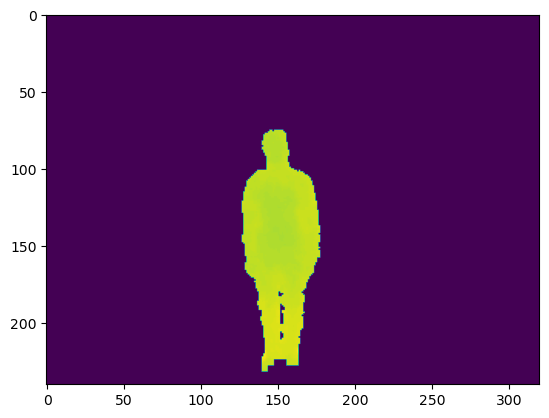

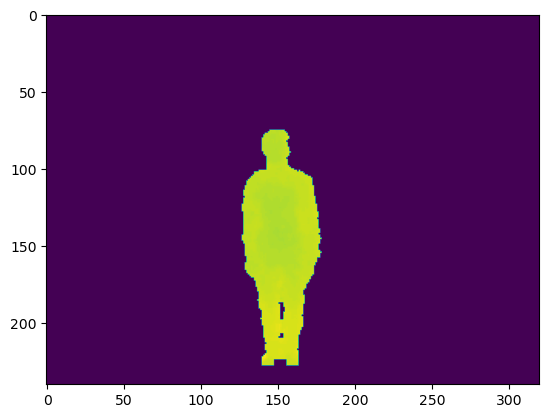

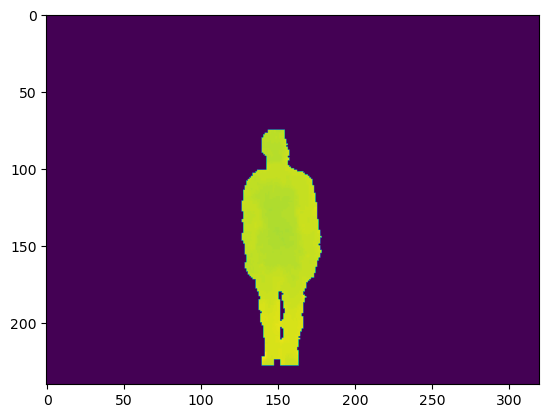

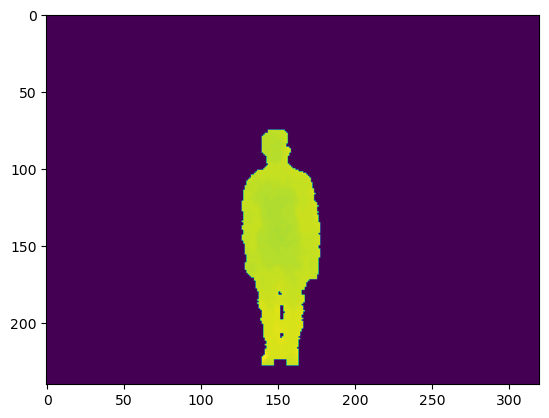

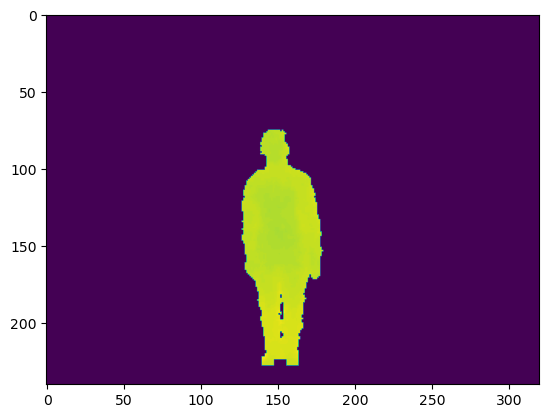

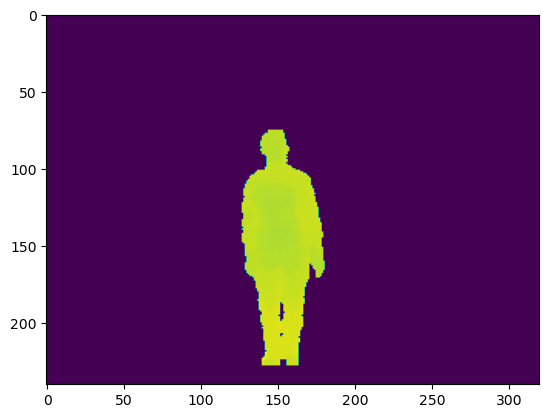

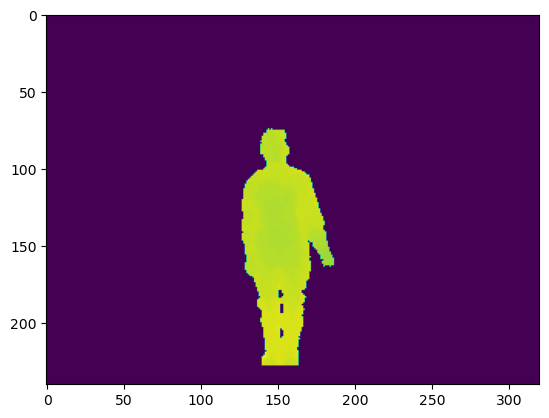

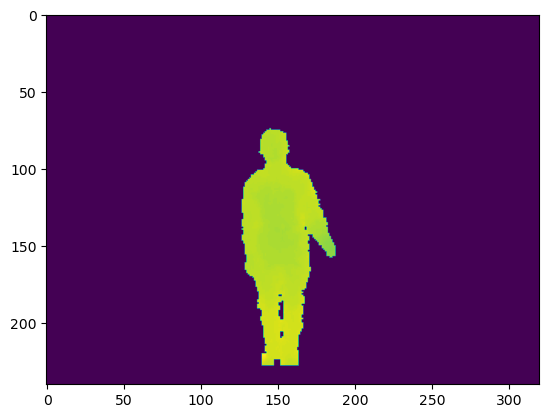

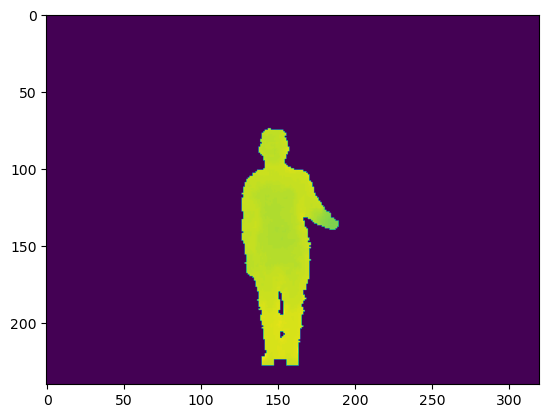

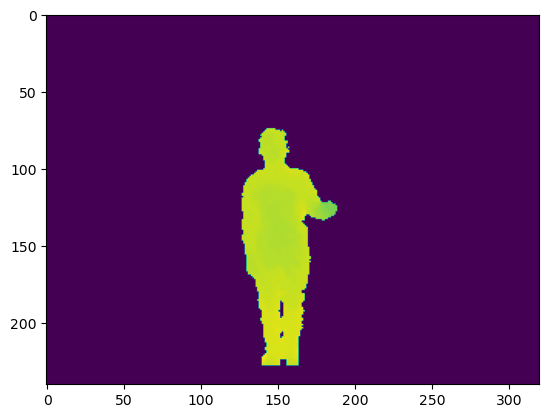

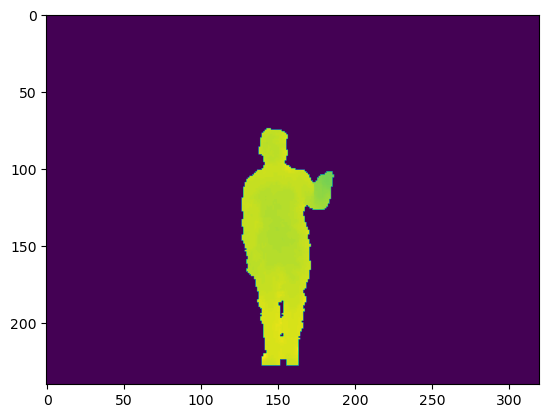

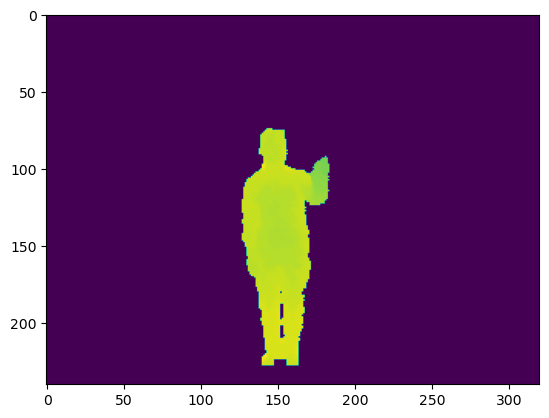

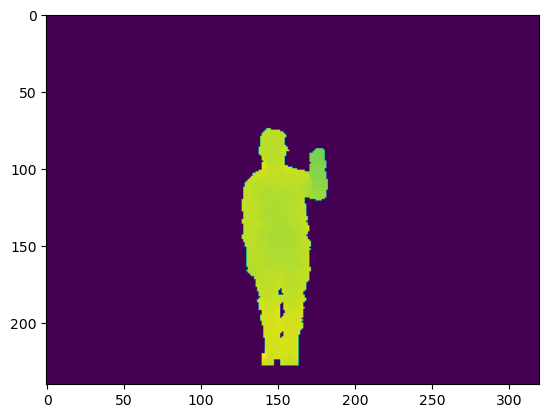

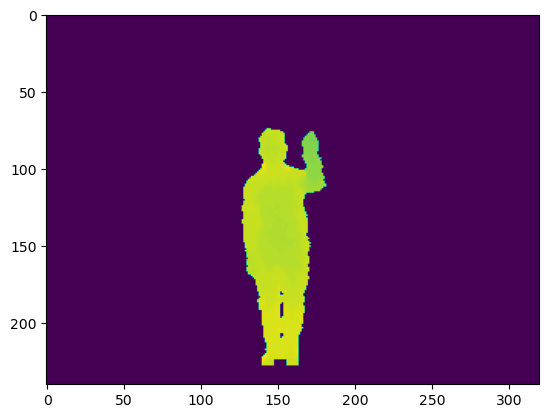

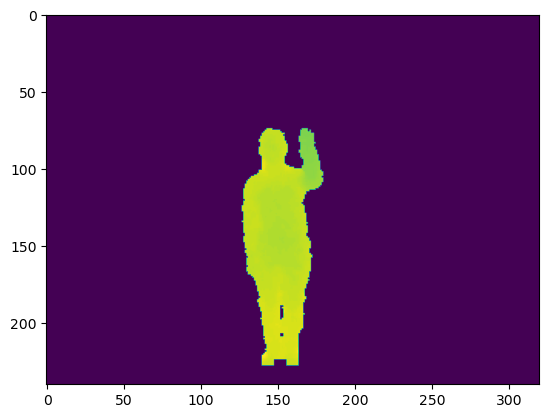

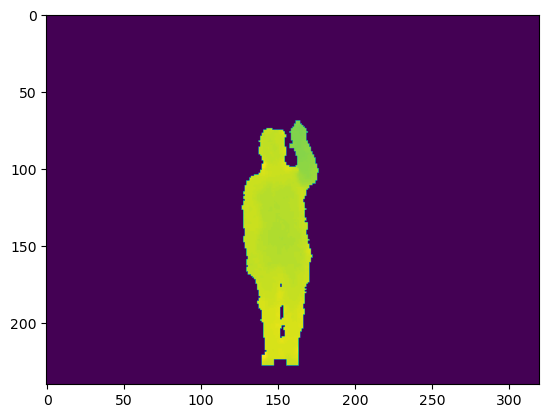

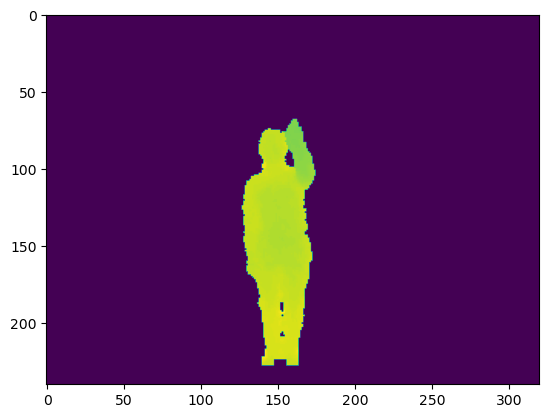

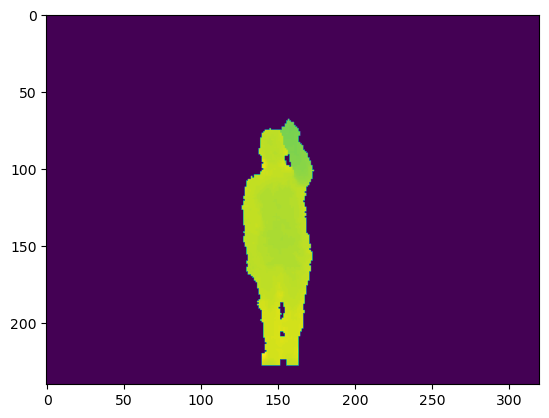

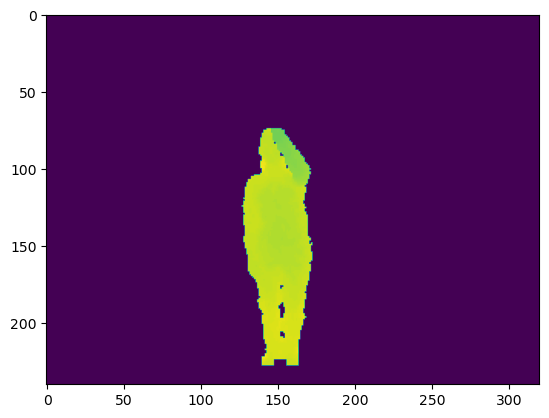

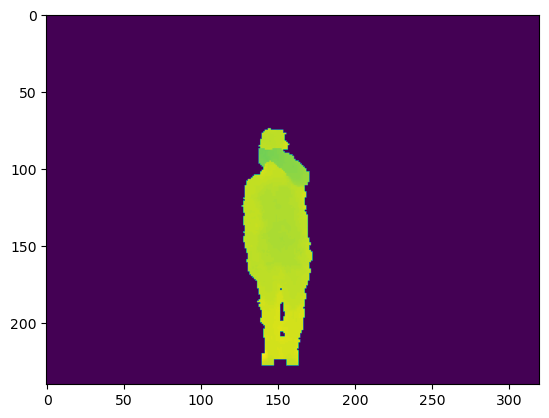

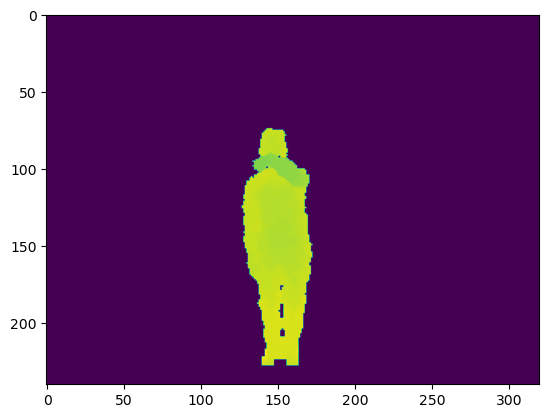

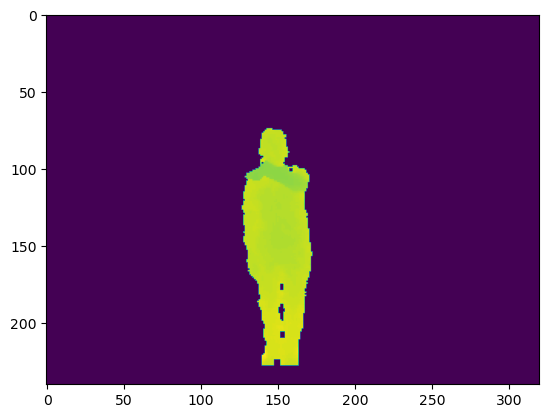

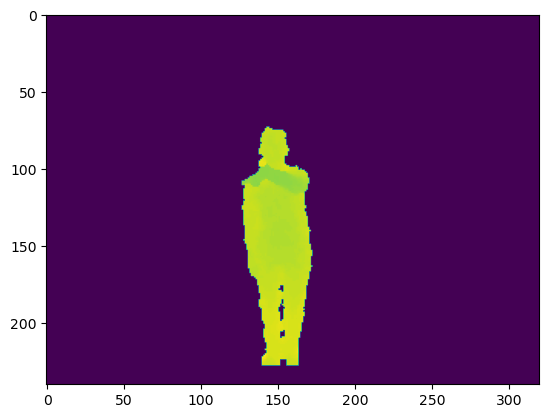

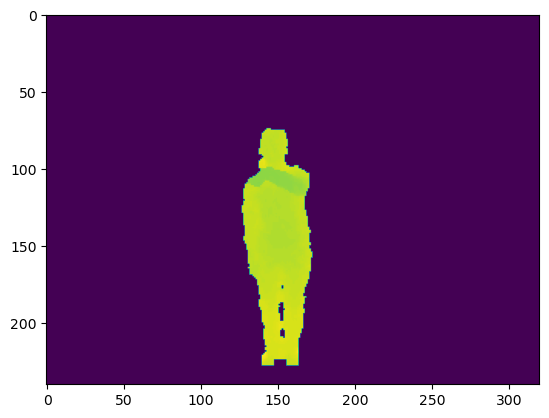

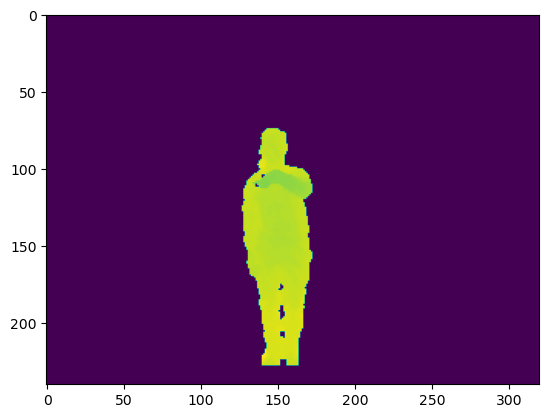

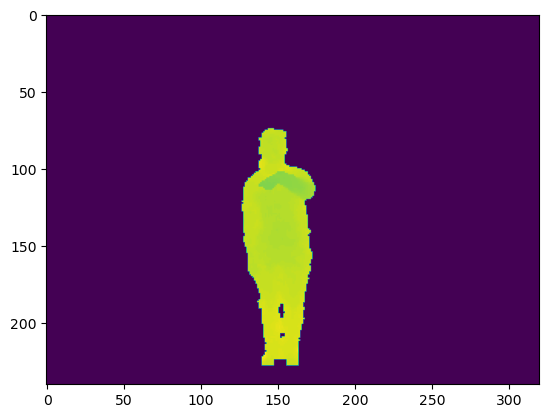

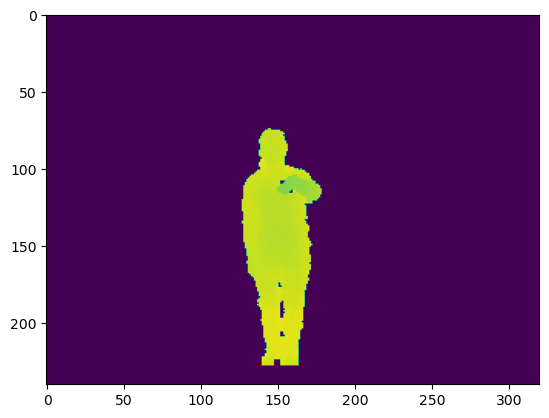

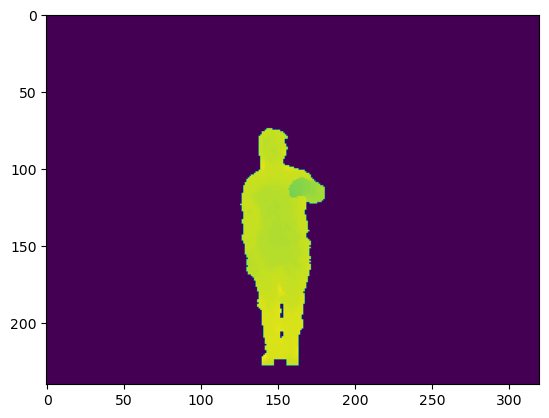

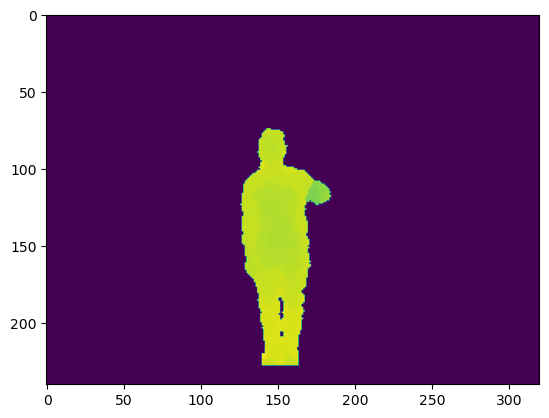

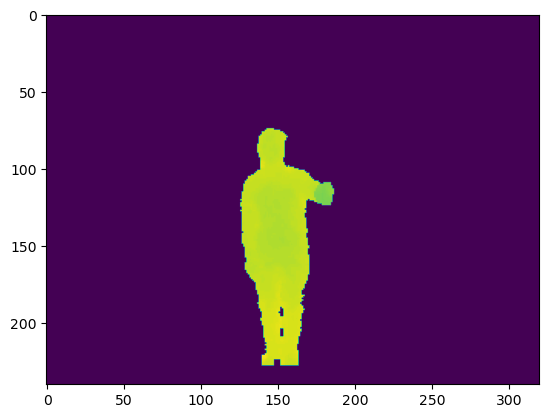

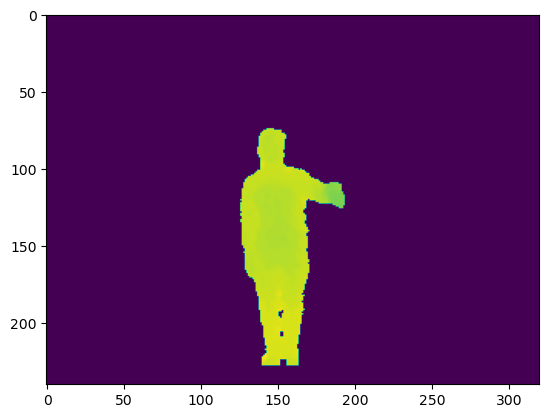

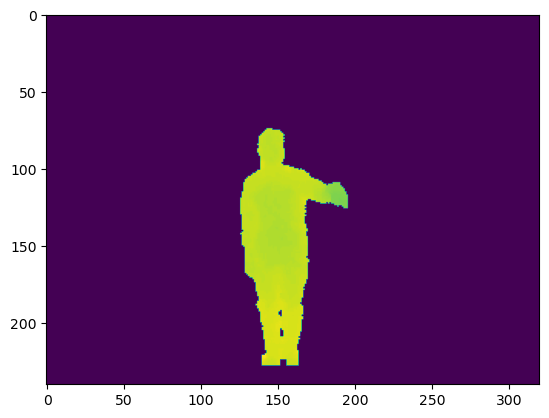

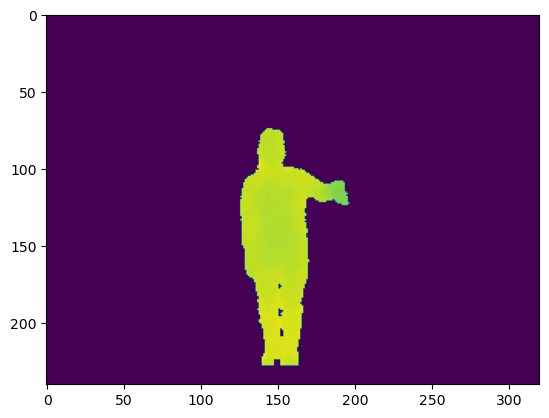

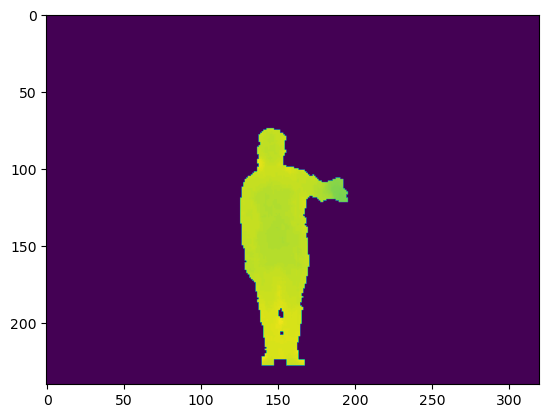

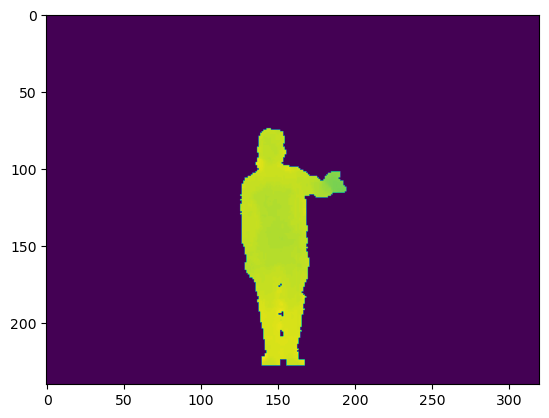

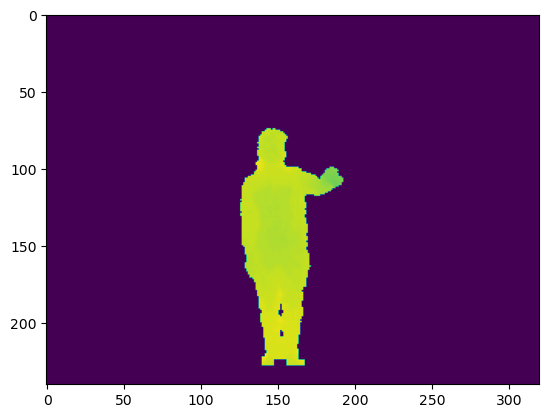

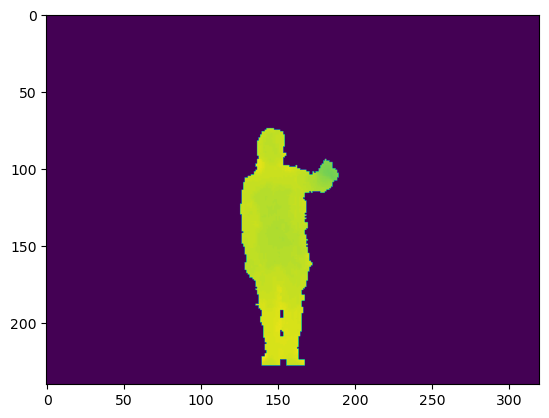

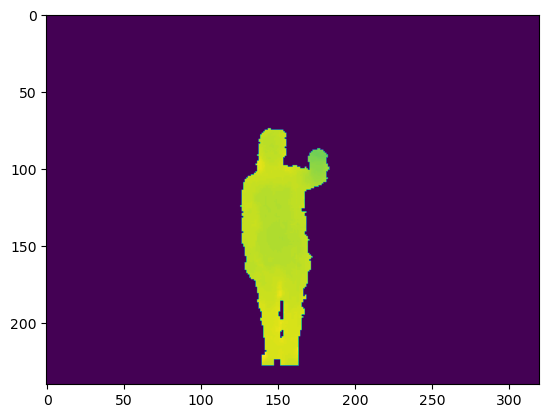

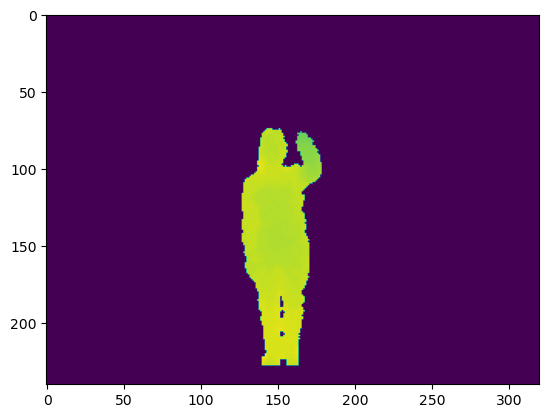

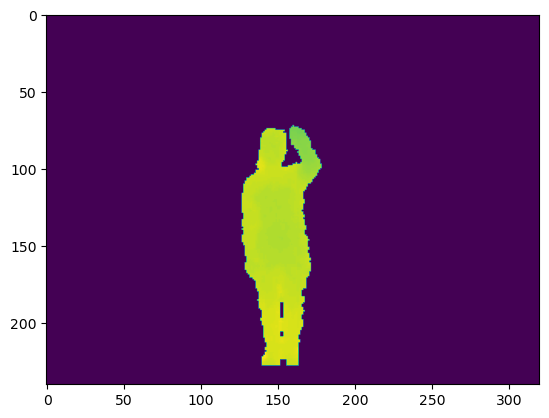

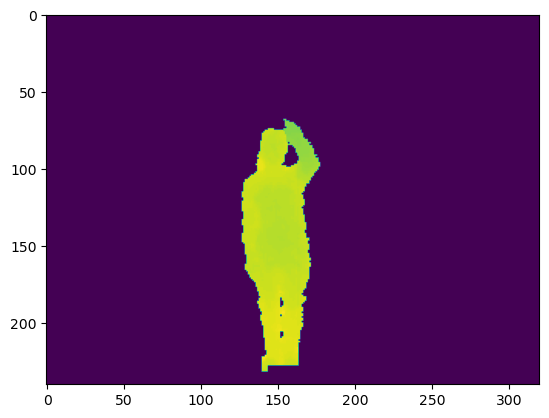

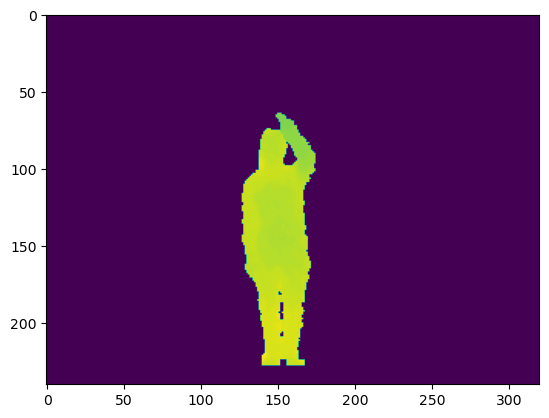

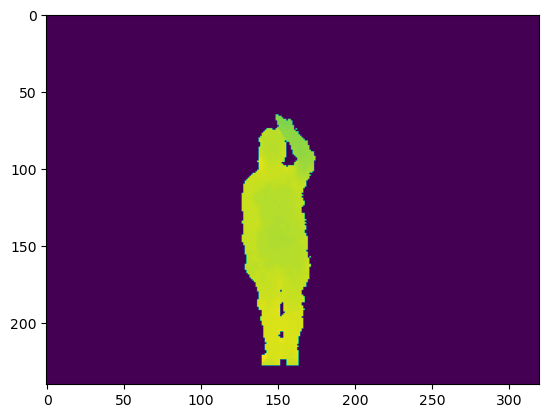

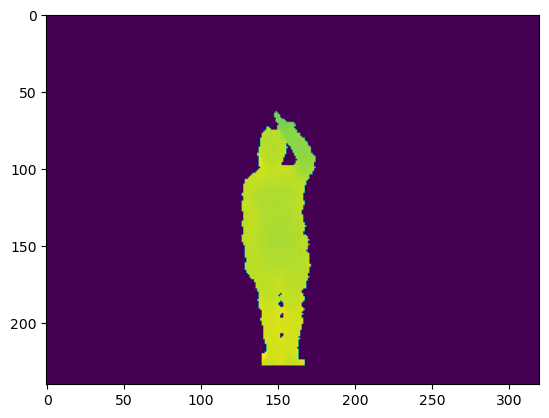

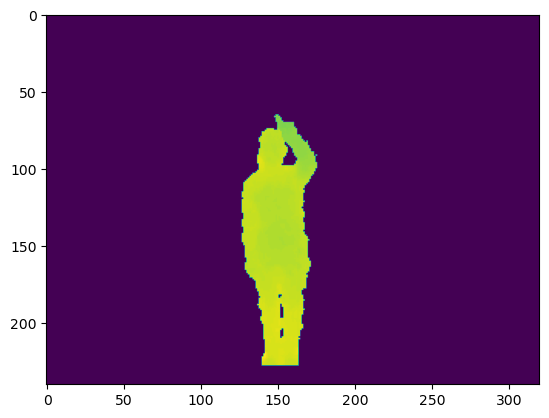

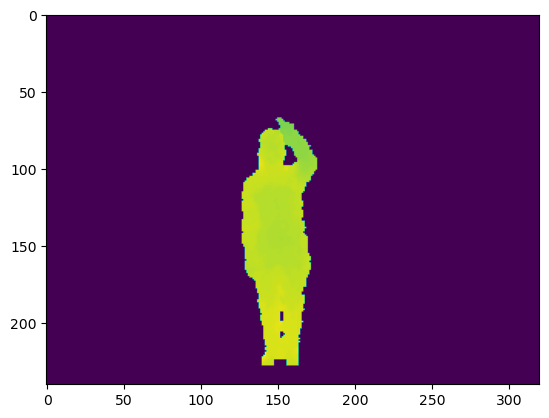

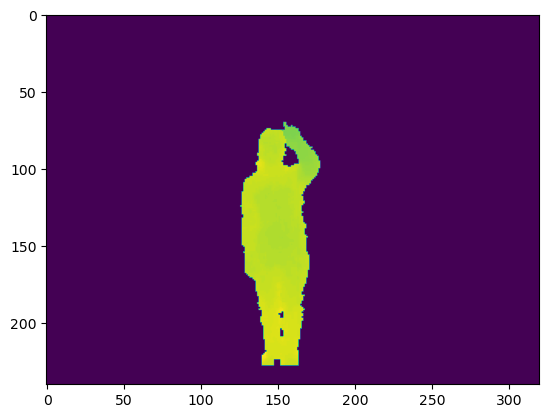

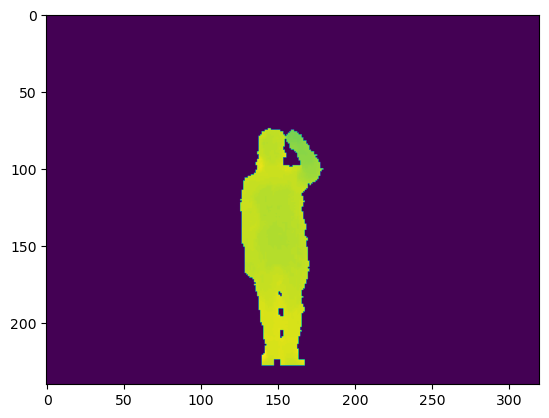

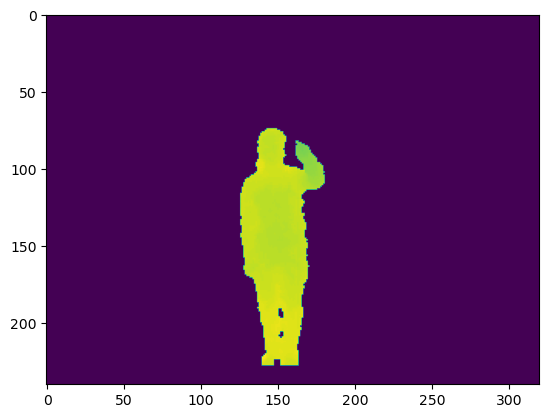

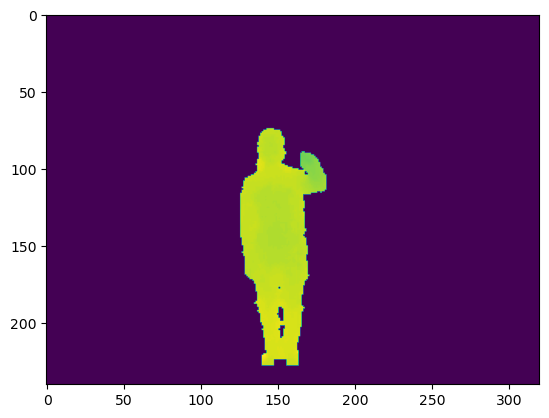

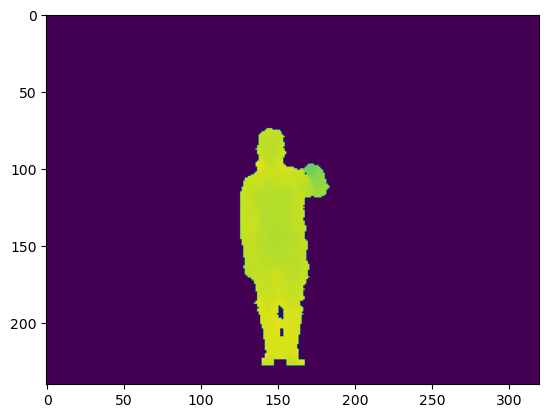

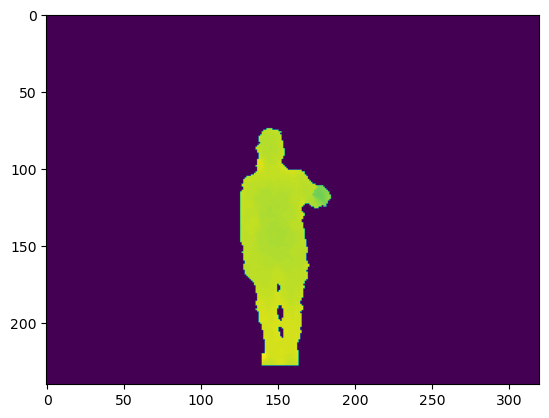

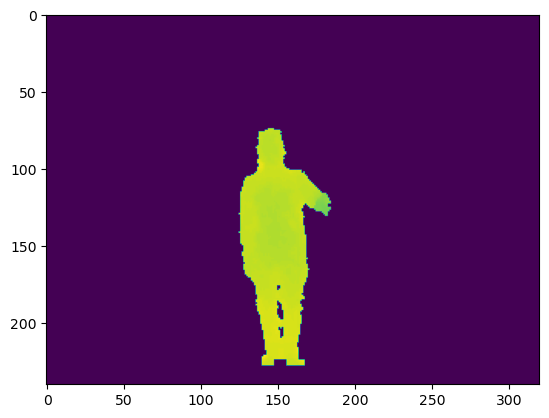

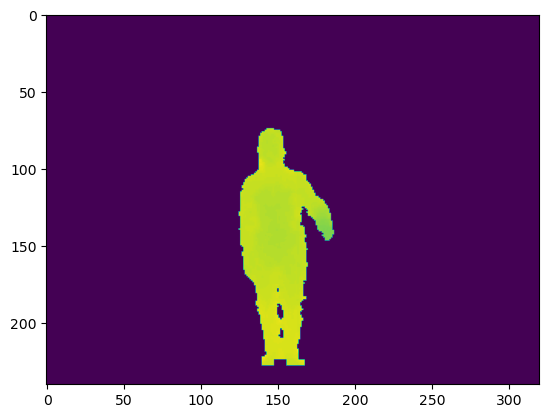

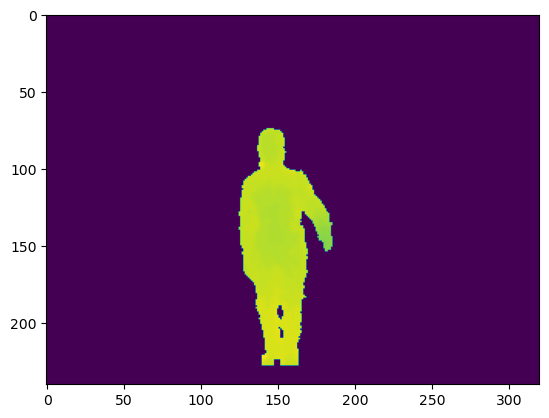

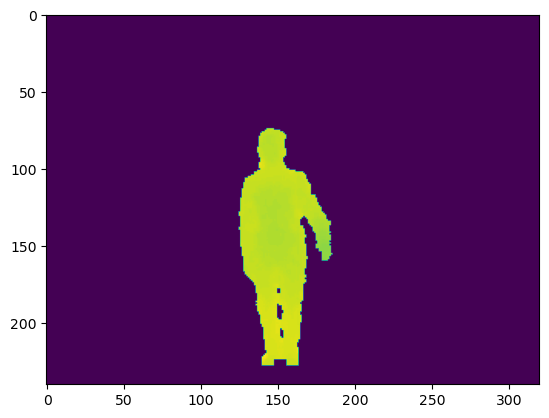

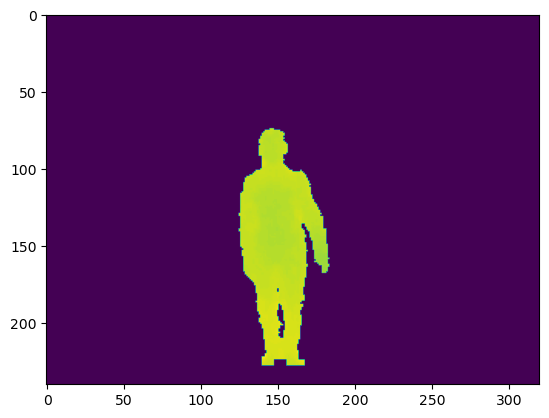

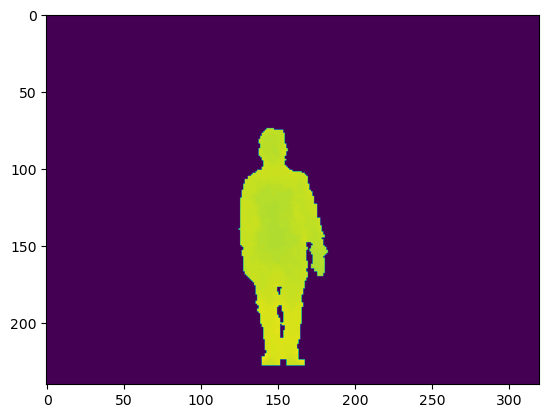

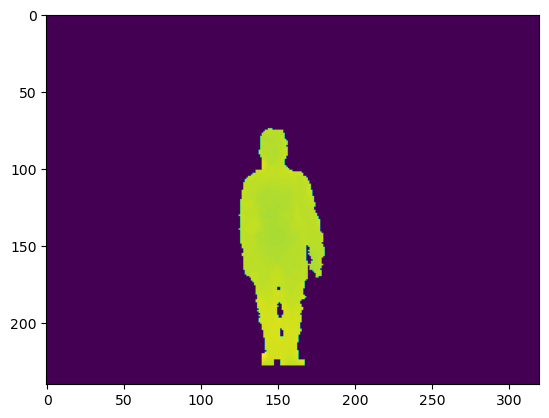

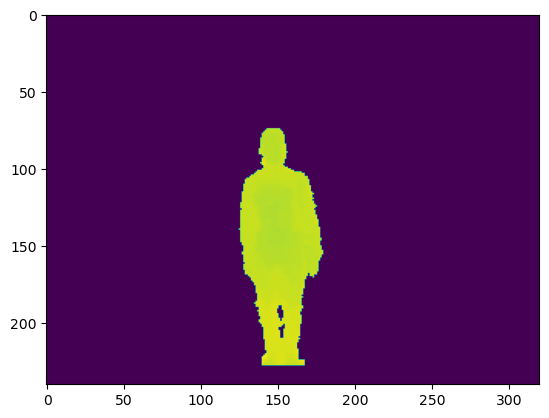

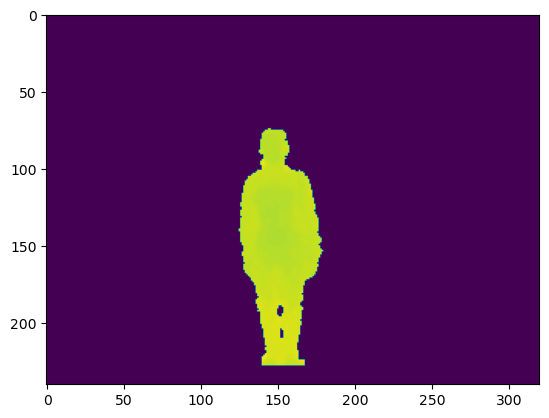

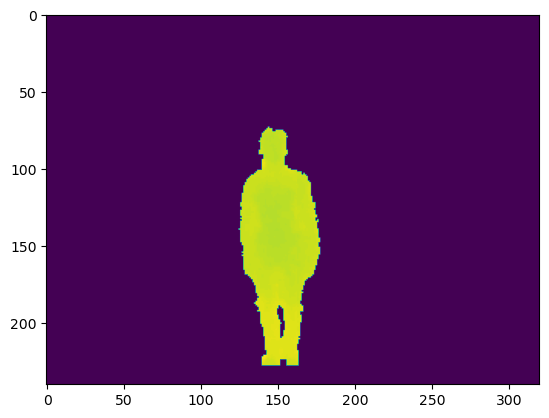

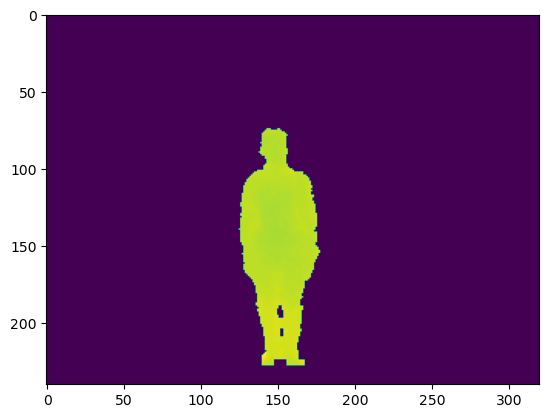

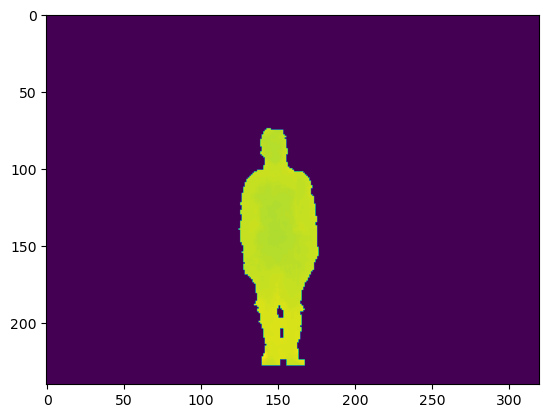

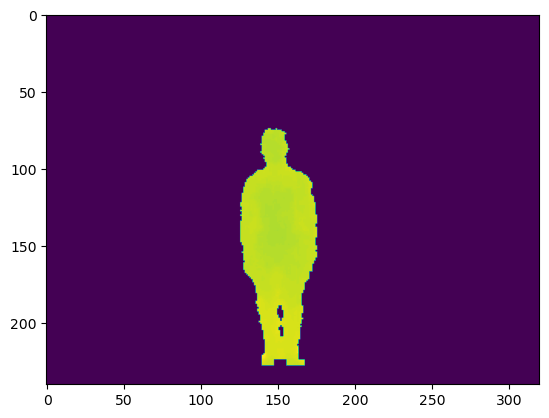

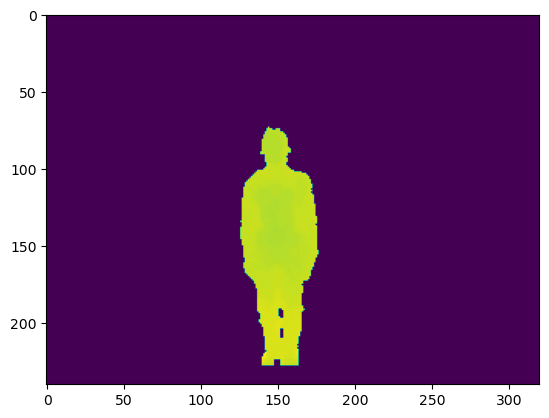

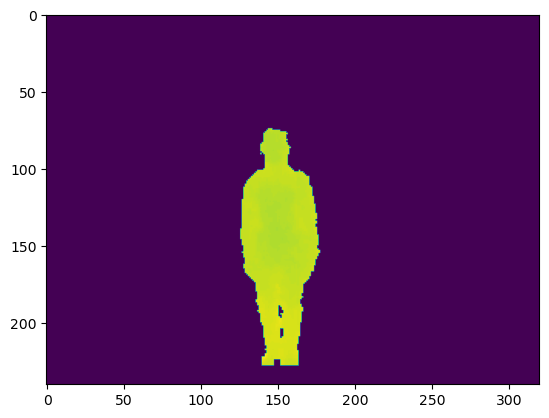

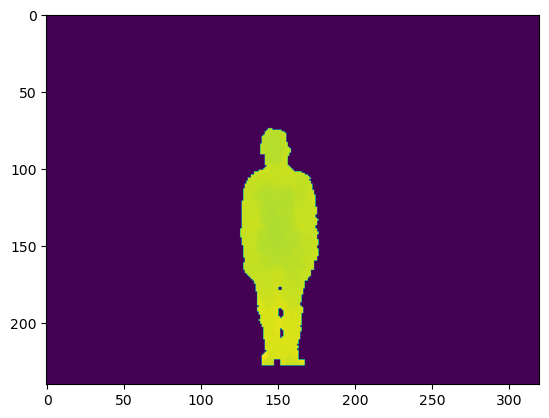

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io

def show_depth(depth):
    num_frame = depth.shape[2]

    for i in range(num_frame):
        plt.imshow(depth[:,:,i])
        plt.show()
        time.sleep(1/20)

# Load the .mat file
mat_data = scipy.io.loadmat(r"C:\Users\ayyag\OneDrive\Desktop\UTD - MHAD\Depth\Depth\a11_s2_t4_depth.mat")

# Assuming your depth data is stored in a variable named 'depth_data' inside the .mat file
depth = mat_data['d_depth']

# Call the function to display the depth frames
show_depth(depth)


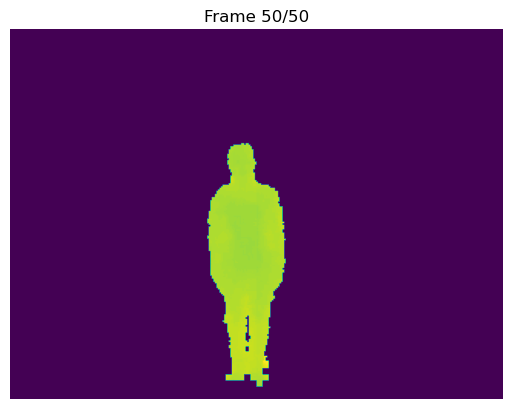

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.io

# Load the .mat file
mat_data = scipy.io.loadmat(r"C:\Users\ayyag\OneDrive\Desktop\UTD - MHAD\Depth\Depth\a27_s2_t4_depth.mat")

# Assuming your depth data is stored in a variable named 'depth_data' inside the .mat file
depth = mat_data['d_depth']

# Create a function to update the displayed image for animation
def update_frame(frame):
    plt.clf()  # Clear the previous frame
    plt.imshow(depth[:,:,frame])
    plt.title(f'Frame {frame + 1}/{depth.shape[2]}')
    plt.axis('off')

# Create a figure and axes for the animation
fig = plt.figure()
ani_axes = fig.add_subplot(111)

# Create the animation object
num_frames = depth.shape[2]
ani = animation.FuncAnimation(fig, update_frame, frames=num_frames, interval=50)

# Save the animation as a GIF file
animation_file = 'a27_s2_t4_depth.gif'
ani.save(animation_file, writer='pillow', fps=20)

plt.show()


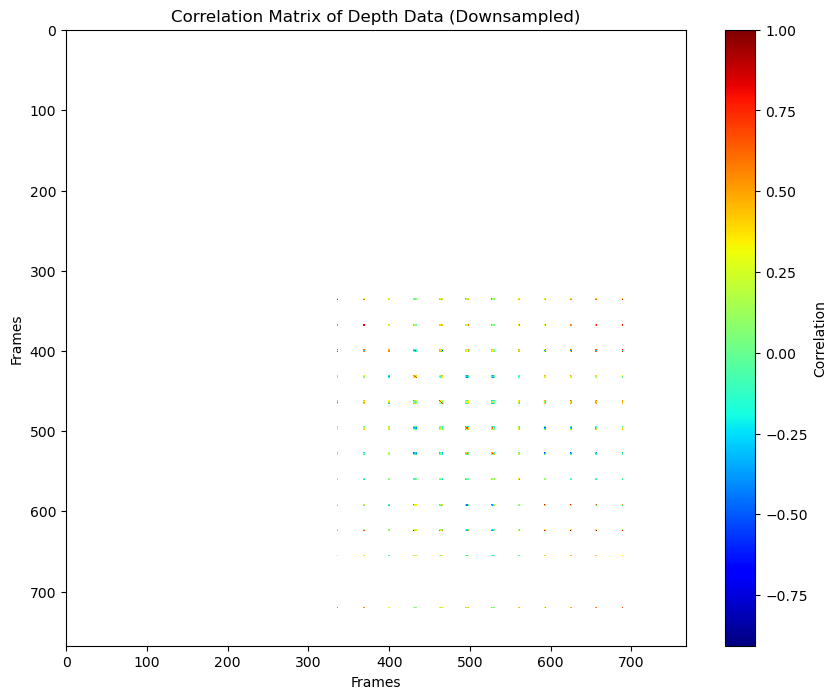

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the .mat file
mat_data = scipy.io.loadmat(r"C:\Users\ayyag\OneDrive\Desktop\UTD - MHAD\Depth\Depth\a27_s2_t4_depth.mat")

# Assuming your depth data is stored in a variable named 'depth_data' inside the .mat file
depth = mat_data['d_depth']

# Downsample the data
downsample_factor = 10  # Adjust the factor as needed
depth_downsampled = depth[::downsample_factor, ::downsample_factor, :]

# Reshape depth data to a 2D array: (pixels, frames)
num_pixels = depth_downsampled.shape[0] * depth_downsampled.shape[1]
num_frames = depth_downsampled.shape[2]
depth_2d = depth_downsampled.reshape(num_pixels, num_frames)

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(depth_2d)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.imshow(correlation_matrix, cmap='jet', aspect='auto')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Depth Data (Downsampled)')
plt.xlabel('Frames')
plt.ylabel('Frames')
plt.show()


In [1]:
import cv2
import scipy.io

# Load .mat file
mat_data = scipy.io.loadmat(r"C:\Users\ayyag\OneDrive\Desktop\UTD - MHAD\Depth\Depth\a13_s1_t4_depth.mat")
depth_video = mat_data['d_depth']

# Get the dimensions of the frames
num_frames, height, width = depth_video.shape

# Create a VideoWriter object to save the video
output_file = 'output_depth_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI format
fps = 30  # Frames per second
output_video = cv2.VideoWriter(output_file, fourcc, fps, (width, height), isColor=False)

# Loop through each frame and add it to the video
for frame_idx in range(num_frames):
    depth_frame = depth_video[frame_idx]
    depth_frame_normalized = cv2.normalize(depth_frame, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    output_video.write(depth_frame_normalized)

# Release the VideoWriter object and close the file
output_video.release()

print(f"Video saved as {output_file}")


Video saved as output_depth_video.avi


In [2]:
import cv2
import scipy.io
import numpy as np

# Load .mat file
mat_data = scipy.io.loadmat(r"C:\Users\ayyag\OneDrive\Desktop\UTD - MHAD\Depth\Depth\a13_s1_t4_depth.mat")
depth_video = mat_data['d_depth']

# Get the dimensions of the frames
num_frames, height, width = depth_video.shape

# Create a VideoWriter object to save the video
output_file = 'output_depth_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI format
fps = 30  # Frames per second
output_video = cv2.VideoWriter(output_file, fourcc, fps, (width, height), isColor=False)

# Normalize depth values to the 8-bit grayscale range (adjust scaling factors as needed)
min_depth = np.min(depth_video)
max_depth = np.max(depth_video)

for frame_idx in range(num_frames):
    depth_frame = depth_video[frame_idx]
    depth_frame_normalized = ((depth_frame - min_depth) / (max_depth - min_depth) * 255).astype(np.uint8)
    output_video.write(depth_frame_normalized)

# Release the VideoWriter object and close the file
output_video.release()

print(f"Video saved as {output_file}")


Video saved as output_depth_video.avi
